In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

### Data Generation
We fist generate data from a linear model.

In [2]:
def gen_data (n_samp=1000):

    X = np.random.normal(0, 0.1, n_samp)

    noise = np.random.normal(0, 0.1, n_samp) #np.random.uniform(-10,10, size=(n_samp,))
    beta = 2
    y = beta * X + noise
    data = pd.DataFrame({'x':X, 'y':y})
    return data

In [3]:
data = gen_data()
print(data.head())

          x         y
0  0.027859  0.058664
1  0.028362 -0.052808
2  0.015106 -0.022534
3 -0.003128  0.095247
4 -0.043328 -0.168956


### Plotting the data



<AxesSubplot:xlabel='x', ylabel='y'>

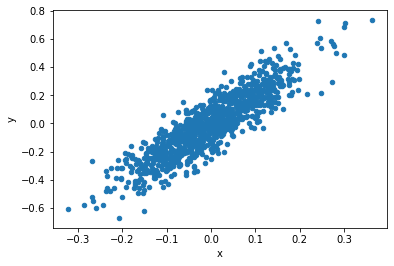

In [4]:
data.plot('x', 'y', kind='scatter')

# Accounting for Coefficient Uncertainty
Since we consider linear models and independent samples $y_i$, we assume the following distribution for our response $Y$,
    \begin{align}  \label{eq1}
    P(Y \mid X, \beta) &=\prod_{i=1}^n  p(y_i \mid x_i, \beta)\\
    p(y_i \mid x_i, \beta) &\sim \mathcal N (y_i \mid x_i^T \beta, \sigma^2) \quad (1)
    \end{align}
    
In addition, since we want to argue about coefficient uncertainty, we also place some distribution $D$ over the parameters $\beta$.
    

### Part (a)
We first assume that the coefficient distribution is Gaussian, $\beta \sim \mathcal N (0, \phi^2)$.
 
Complete the function below with the expression you found in the theoretical exercise for
    $\text{log} \Big( p(\beta)  p(Y \mid X, \beta) \Big)\;.$

In [6]:
def log_term(params_beta, data):
    mu_beta, sig_beta = params_beta
    x = data['x']
    y = data['y']
    n = len(x)
    beta_dist = np.random.normal(mu_beta, sig_beta, n)
    sig_lm = np.std(y)
    beta = np.sum(y)/np.sum(x)
    result =  -((n/2) * np.log( sig_beta*sig_lm*np.pi)) - (np.sum(np.square(beta_dist))/ (2*np.square(sig_beta))) - (np.sum(np.square(y-(beta*x)))/(2*np.square(sig_lm)))
    return result

In [7]:
print(log_term((1, 1), data))

2.6076577399167307
-971.5168195791188


###  Part (b)

Solve the expression 
    $\text{max}_\beta \text{log} \Big( p(\beta)  p(Y \mid X, \beta) \Big)\; (5.2)$ 
for $\beta$.

In [8]:
#Hint function:
import scipy.optimize as optimize

params_beta = (1,1)

def log_likelihood(beta, params_beta, data):
    mu_beta, sig_beta = params_beta
    x = data['x']
    y = data['y']
    n = len(x)
    beta_dist = np.random.normal(mu_beta, sig_beta, n)
    sig_lm = np.std(y)
    #beta = np.sum(y)/np.sum(x)
    result =  -((n/2) * np.log( sig_beta*sig_lm*np.pi)) - (np.sum(np.square(beta_dist))/ (2*np.square(sig_beta))) - (np.sum(np.square(y-(beta*x)))/(2*np.square(sig_lm)))
    return (-1 * result)

def constraint(params_beta_max):
    sigma = params_beta_max[1]
    
    return sigma

cons = {'type':'ineq', 'fun': constraint}

beta = np.sum(y)/np.sum(x)

optimize.minimize(log_likelihood, beta, method = 'Nelder-Mead', args=(params_beta,data))

 final_simplex: (array([[2.57506202],
       [2.57506202]]), array([839.69456103, 983.24653887]))
           fun: 839.694561028755
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 200
           nit: 75
        status: 1
       success: False
             x: array([2.57506202])

### Part (c)

Sample different values for $\beta$ from a Gaussian distribution and create a histogram over these. Indicate the estimate for $\beta$ that you found in part (b).

## Part (d) 
Repeat parts (b) and (c) with increasing numbers of datapoints, e.g., $n=10, n=100, n=1000$.

Can you observe a trend?